In [1]:
import gzip
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

import tensorflow as tf
import pandas as pd

In [2]:
data_dir = Path('C:/Amin/Workspace/Data/MNIST')

f = gzip.open(data_dir/'train-images-idx3-ubyte.gz','r')
image_size = 28
num_images = 60000


f.read(16)
buf = f.read(image_size * image_size * num_images)
data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
data = data.reshape(num_images, image_size, image_size, 1)

# image = np.asarray(data[2]).squeeze()
# plt.imshow(image)
# plt.show()


In [3]:
f = gzip.open(data_dir/'train-labels-idx1-ubyte.gz','r')
f.read(8)
# for i in range(0,5):
#     buf = f.read(1)
#     labels = np.frombuffer(buf, dtype=np.uint8).astype(np.int64)
#     print(labels)

buf = f.read(num_images)
labels = np.frombuffer(buf, dtype=np.uint8).astype(np.int64)
# print(labels)

In [4]:
X = np.asarray(data).squeeze()
y = labels
shape = (28, 28)

In [5]:
model = tf.keras.Sequential([
#         tf.keras.layers.Flatten(input_shape=shape),
        tf.keras.layers.InputLayer(input_shape=[28, 28, 1]),
        
        # first hidden layer
        tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=1, padding="same"),  # , input_shape=(28, 28, 1)
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
        
        # second hidden layer
        tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=1, padding="same"),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.MaxPool2D(pool_size=2, strides=2),

    
        # third hidden layer
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(units=100),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('relu'),

    
        # output layer
        tf.keras.layers.Dense(units=10, activation=tf.nn.softmax)
        ])


In [6]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) ,
                metrics=['accuracy'])

In [7]:
history = model.fit(
    X, y,
    batch_size=64,
    epochs=10,
)

Epoch 1/10
938/938 [==============================] - 5s 3ms/step - loss: 1.5107 - accuracy: 0.9661
Epoch 2/10
938/938 [==============================] - 3s 3ms/step - loss: 1.4772 - accuracy: 0.9871
Epoch 3/10
938/938 [==============================] - 3s 3ms/step - loss: 1.4729 - accuracy: 0.9906
Epoch 4/10
938/938 [==============================] - 3s 3ms/step - loss: 1.4708 - accuracy: 0.9921
Epoch 5/10
938/938 [==============================] - 3s 3ms/step - loss: 1.4688 - accuracy: 0.9941
Epoch 6/10
938/938 [==============================] - 3s 3ms/step - loss: 1.4675 - accuracy: 0.9948
Epoch 7/10
938/938 [==============================] - 3s 3ms/step - loss: 1.4672 - accuracy: 0.9950
Epoch 8/10
938/938 [==============================] - 3s 3ms/step - loss: 1.4663 - accuracy: 0.9958
Epoch 9/10
938/938 [==============================] - 3s 3ms/step - loss: 1.4662 - accuracy: 0.9958
Epoch 10/10
938/938 [==============================] - 3s 3ms/step - loss: 1.4652 - accuracy: 0.9966

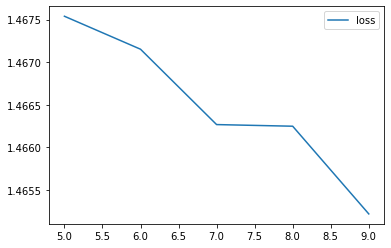

In [8]:
history_df = pd.DataFrame(history.history)
# Start the plot at epoch 5. You can change this to get a different view.
history_df.loc[5:, ['loss']].plot();

In [9]:
# test

f = gzip.open(data_dir/'t10k-images-idx3-ubyte.gz','r')
image_size = 28
num_images = 10000


f.read(16)
buf = f.read(image_size * image_size * num_images)
data_test = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
data_test = data_test.reshape(num_images, image_size, image_size, 1)

# image = np.asarray(data_test[2]).squeeze()
# plt.imshow(image)
# plt.show()

In [10]:
f = gzip.open(data_dir/'t10k-labels-idx1-ubyte.gz','r')
f.read(8)
# for i in range(0,5):
#     buf = f.read(1)
#     labels = np.frombuffer(buf, dtype=np.uint8).astype(np.int64)
#     print(labels)

buf = f.read(num_images)
labels_test = np.frombuffer(buf, dtype=np.uint8).astype(np.int64)
# print(labels)

In [11]:
# predictions = model.predict(data_test)
X = np.asarray(data_test).squeeze()
y = labels_test
test_loss, test_acc = model.evaluate(X,  y)
print('\nTest accuracy:', test_acc)

313/313 [==============================] - 3s 2ms/step - loss: 1.4705 - accuracy: 0.9917

Test accuracy: 0.9916999936103821
